In [1]:
import numpy as np
import torch

from train import TrainerDAGMM
from test import eval
from preprocess import get_KDDCup99

In [2]:
class Args:
    num_epochs=200
    patience=50
    lr=1e-4
    lr_milestones=[50]
    batch_size=1024
    latent_dim=1
    n_gmm=4
    lambda_energy=0.1
    lambda_cov=0.005
    
    
args = Args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = get_KDDCup99(args)

dagmm = TrainerDAGMM(args, data, device)
dagmm.train()

  1024/198371: [>...............................] - ETA 0.0s

/home/ec2-user/PyTorch-DAGMM/forward_step.py:79: UserWarning: torch.potrf is deprecated in favour of torch.cholesky and will be removed in the next release. Please use torch.cholesky instead and note that the :attr:`upper` argument in torch.cholesky defaults to ``False``.
  l = torch.potrf(a, False)


198371/198371: [===============================>] - ETA 1.2sss
Training DAGMM... Epoch: 0, Loss: 43065038.330
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 1, Loss: 43097073.753
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 2, Loss: 43083459.608
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 3, Loss: 43092447.732
198371/198371: [===============================>] - ETA 0.1ss
Training DAGMM... Epoch: 4, Loss: 43082362.928
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 5, Loss: 43072141.938
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 6, Loss: 43085888.639
198371/198371: [===============================>] - ETA 0.1ss
Training DAGMM... Epoch: 7, Loss: 43078235.979
198371/198371: [===============================>] - ETA 0.1ss
Training DAGMM... Epoch: 8, Loss: 43077461.897
198371/198371: [=======

198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 75, Loss: 43073175.381
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 76, Loss: 43081122.103
198371/198371: [===============================>] - ETA 0.1ss
Training DAGMM... Epoch: 77, Loss: 43087262.392
198371/198371: [===============================>] - ETA 0.1ss
Training DAGMM... Epoch: 78, Loss: 43067343.423
198371/198371: [===============================>] - ETA 0.1ss
Training DAGMM... Epoch: 79, Loss: 43103929.918
198371/198371: [===============================>] - ETA 0.1ss
Training DAGMM... Epoch: 80, Loss: 43089660.371
198371/198371: [===============================>] - ETA 0.1ss
Training DAGMM... Epoch: 81, Loss: 43080217.258
198371/198371: [===============================>] - ETA 0.1ss
Training DAGMM... Epoch: 82, Loss: 43090317.237
198371/198371: [===============================>] - ETA 0.1ss
Training DAGMM... Epoch: 83, Loss: 43078276.103
198371/19837

In [3]:
from test import eval

labels, scores = eval(dagmm.model, data, device, args.n_gmm)

Testing...


/home/ec2-user/PyTorch-DAGMM/forward_step.py:79: UserWarning: torch.potrf is deprecated in favour of torch.cholesky and will be removed in the next release. Please use torch.cholesky instead and note that the :attr:`upper` argument in torch.cholesky defaults to ``False``.
  l = torch.potrf(a, False)


Precision : 0.9486, Recall : 0.9169, F-score : 0.9325
ROC AUC score: 98.00


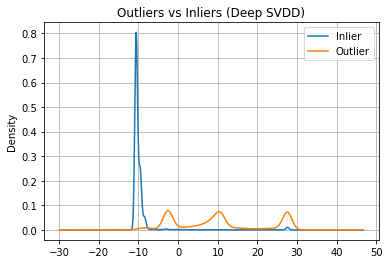

In [5]:
import matplotlib.pyplot as plt
import pandas as pd 

scores_in = scores[np.where(labels==0)[0]]
scores_out = scores[np.where(labels==1)[0]]


in_ = pd.DataFrame(scores_in, columns=['Inlier'])
out_ = pd.DataFrame(scores_out, columns=['Outlier'])


fig, ax = plt.subplots()
in_.plot.kde(ax=ax, legend=True, title='Outliers vs Inliers (Deep SVDD)')
out_.plot.kde(ax=ax, legend=True)
ax.grid(axis='x')
ax.grid(axis='y')
plt.show()